In [1]:
# Compile and import local pyrossgeo module
import os, sys
owd = os.getcwd()
os.chdir('../../')
sys.path.insert(0,'../../')
!sh local_setup.sh
os.chdir(owd)

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pyrossgeo

running build_ext


Simulation settings

In [49]:
t_start = 0
t_end = 24*60*700

_, dts = pyrossgeo.utils.get_dt_schedule([
    (0,  1*60),
    (7*60,  1),
    (10*60, 2*60),
    (17*60, 1),
    (19*60, 2*60)
], end_time=24*60)

Run simulation

In [56]:
sim = pyrossgeo.Simulation()

X_state = sim.initialize()
dX_state = np.zeros(X_state.size)

sim_data = sim.simulate(X_state, t_start, t_end, 1, steps_per_save=1)

ts, node_data, cnode_data, location_data, community_data, network_data = pyrossgeo.utils.extract_simulation_data(sim_data)

ts_days = ts / (24*60)
ts_hours = ts / 60

## Plot data

Text(0.5, 0, 'Days')

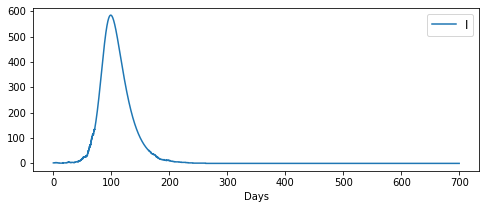

In [57]:
plt.figure( figsize=(8,3) )

S = np.sum(network_data[:,:,0], axis=1)
I = np.sum(network_data[:,:,1], axis=1)
R = np.sum(network_data[:,:,2], axis=1)
N = S + I + R

s = ts_days > 150
s = ts_days > 0

#plt.plot(ts_days, S, label="S")
plt.plot(ts_days[s], I[s], label="I")
#plt.plot(ts_days, R, label="R")
#plt.plot(ts_days, N, label="N")

plt.legend(loc='upper right', fontsize=12)
#plt.xlim(150, 200)
#plt.ylim(0, 30)
plt.xlabel('Days')

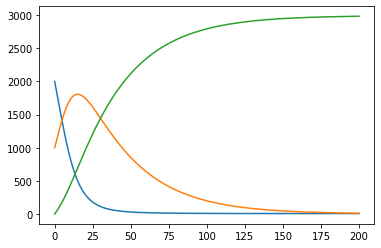

In [5]:
min_in_days = 60*24
beta = 0.18 / min_in_days
gamma = 0.03 / min_in_days

s = 2000
i = 1000
r = 0
n = s + i + r

dt = 0.1
ss = [s]
ii = [i]
rr = [r]
tt = [0]

t = 0

for t in np.arange(t_start+dt, t_end, dt):
    ds = ( -beta*i*s/n )
    di = ( beta*i*s/n - gamma*i)
    dr = (gamma*i)
    
    s += ds*dt
    i += di*dt
    #print(s+ds*dt)
    r += dr*dt

    ss.append(s)
    ii.append(i)
    rr.append(r)
    tt.append(t)
    
tt_days = np.array(tt) / min_in_days
    
plt.plot(tt_days, ss, label="S")
plt.plot(tt_days, ii, label="I")
plt.plot(tt_days, rr, label="R")

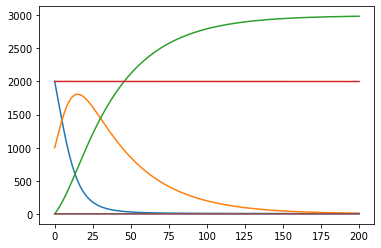

In [6]:
plt.plot(tt_days, ss, label="S")
plt.plot(tt_days, ii, label="I")
plt.plot(tt_days, rr, label="R")

plt.plot(ts_days, S, label="S")
plt.plot(ts_days, I, label="I")
plt.plot(ts_days, R, label="R")

In [7]:
print("ss = {%s};" %  ",".join(map(str, S)))
print("ii = {%s};" %  ",".join(map(str, I)))
print("rr = {%s};" %  ",".join(map(str, R)))
print("ts = {%s};" %  ",".join(map(str, ts_days)))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [8]:
plt.figure( figsize=(14,7) )

S0 = network_data[:,0,0]
I0 = network_data[:,0,1]
R0 = network_data[:,0,2]
S1 = network_data[:,1,0]
I1 = network_data[:,1,1]
R1 = network_data[:,1,2]
S2 = network_data[:,2,0]
I2 = network_data[:,2,1]
R2 = network_data[:,2,2]
S3 = network_data[:,3,0]
I3 = network_data[:,3,1]
R3 = network_data[:,3,2]

plt.plot(ts_days, S0, label="S0")
plt.plot(ts_days, I0, label="I0")
plt.plot(ts_days, R0, label="R0")
plt.plot(ts_days, S1, label="S1")
plt.plot(ts_days, I1, label="I1")
plt.plot(ts_days, R1, label="R1")
plt.plot(ts_days, S2, label="S2")
plt.plot(ts_days, I2, label="I2")
plt.plot(ts_days, R2, label="R2")
plt.plot(ts_days, S3, label="S3")
plt.plot(ts_days, I3, label="I3")
plt.plot(ts_days, R3, label="R3")

plt.legend(loc='upper right', fontsize=12)
plt.xlabel('Days')

IndexError: index 1 is out of bounds for axis 1 with size 1

<Figure size 1008x504 with 0 Axes>